0816028 周孟謙

# I. Introduction:
這次的project為利用線上購物時買家的各種資料去預測最後是否會買下商品

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend

# II. Data Collection:
這次的資料為Online Shoppers Purchasing Intention Dataset Data Set，是在UCI網站找到的
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

data.shape

(12330, 18)

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 使用圖形來分析資料的feature和label

Administrative, Informational, ProductRelated分別表示使用者在訪問網頁時的不同類型的頁面數量。 Administrative為辦帳號、下單網頁， Informational為產品信息， ProductRelated為相關產品網頁，我們可以看到前面兩者皆為0最大，而ProductRelated 則有許多數字大於0，其原因可能為大部分人買產品多會貨比三家。Duration則為各類型網頁的使用時間。這些值來源於用戶訪問過的頁面的URL信息，並在用戶採取相關行動時實時更新，例如: 從一頁移動到另一頁。


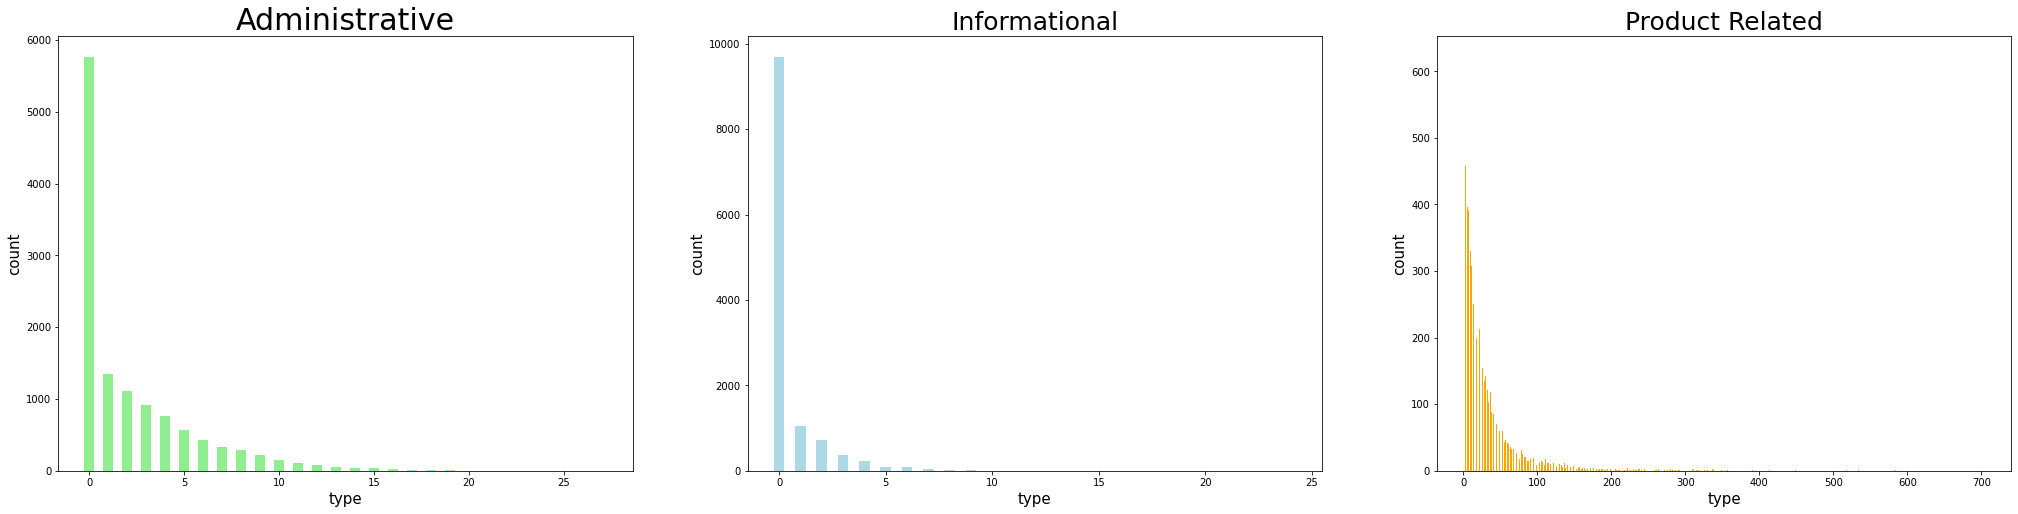

In [5]:
plt.rcParams['figure.figsize'] = (35, 8)

plt.subplot(1, 3, 1)
plt.bar(data['Administrative'].unique(),
        data['Administrative'].value_counts(sort = False), 
        width=0.5, 
        bottom=None, 
        align='center', color = 'lightgreen')
plt.title('Administrative', fontsize = 30)
plt.xlabel('type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 3, 2)
plt.rcParams['figure.figsize'] = (7, 7)
plt.bar(data['Informational'].unique(),
        data['Informational'].value_counts(sort = False), 
        width=0.5, 
        bottom=None, 
        align='center', color = 'lightblue')
plt.title('Informational', fontsize = 25)
plt.xlabel('type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 3, 3)
plt.bar(data['ProductRelated'].unique(),
        data['ProductRelated'].value_counts(sort = False), 
        width=0.5, 
        bottom=None, 
        align='center', color = 'orange')

#plt.hist(data['ProductRelated'], color = 'lightgreen')
plt.title('Product Related', fontsize = 25)
plt.xlabel('type', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

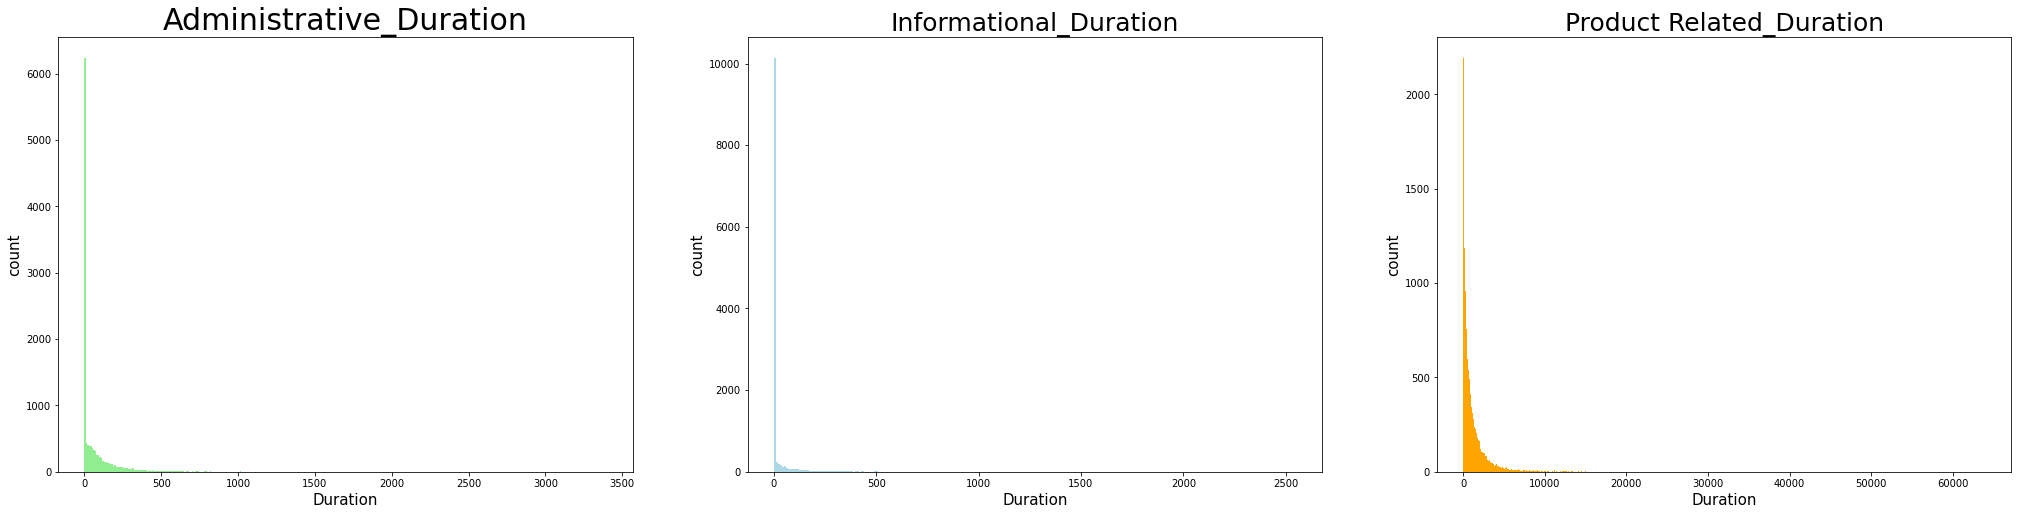

In [6]:
plt.rcParams['figure.figsize'] = (35, 8)

plt.subplot(1, 3, 1)
#plt.axis([0, 4000, 0, 7000])
plt.hist(data['Administrative_Duration'], density=False, color = 'lightgreen', cumulative = False, bins=350)
plt.title('Administrative_Duration', fontsize = 30)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('count', fontsize = 15)
#plt.show()

plt.subplot(1, 3, 2)
plt.hist(data['Informational_Duration'], density=False, color = 'lightblue', cumulative = False, bins=250)
plt.title('Informational_Duration', fontsize = 25)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('count', fontsize = 15)
#plt.show()

plt.subplot(1, 3, 3)
plt.hist(data['ProductRelated_Duration'], density=False, color = 'orange', cumulative = False, bins=600)
plt.title('Product Related_Duration', fontsize = 25)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

「跳出率」: 在一進入網站之後馬上就離開訪客的百分比。未停留在網站中繼續瀏覽頁面，（就像被跳出樣）。

「離開率」: 對網頁的所有瀏覽量來說，「離開率」是網頁成為工作階段中「最後」的百分比。也就是最後瀏覽的網頁，並從這頁離開。

「網頁價值」: 使用者在抵達目標網頁或完成電子商務交易 (或兩者) 之前所造訪網頁的平均價值。

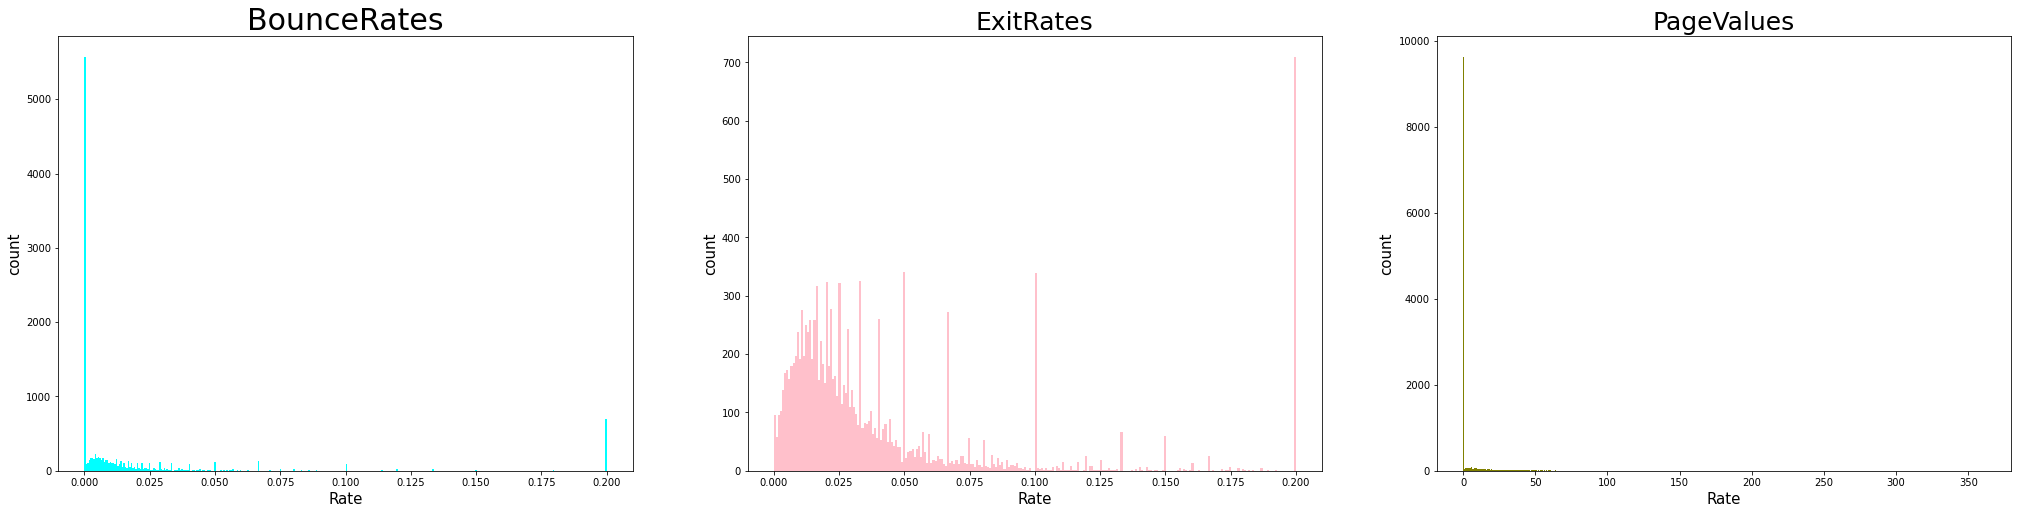

In [7]:
plt.rcParams['figure.figsize'] = (35, 8)

plt.subplot(1, 3, 1)
#plt.axis([0, 4000, 0, 7000])
plt.hist(data['BounceRates'], density=False, color = 'cyan', cumulative = False, bins=350)
plt.title('BounceRates', fontsize = 30)
plt.xlabel('Rate', fontsize = 15)
plt.ylabel('count', fontsize = 15)
#plt.show()

plt.subplot(1, 3, 2)
plt.hist(data['ExitRates'], density=False, color = 'pink', cumulative = False, bins=250)
plt.title('ExitRates', fontsize = 25)
plt.xlabel('Rate', fontsize = 15)
plt.ylabel('count', fontsize = 15)
#plt.show()

plt.subplot(1, 3, 3)
plt.hist(data['PageValues'], density=False, color = 'olive', cumulative = False, bins=600)
plt.title('PageValues', fontsize = 25)
plt.xlabel('Rate', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

“SpecialDay” 表示訪問網站時間與特定特殊日子（例如母親節、情人節）的接近程度，該交易可能就是為了該節日而進行的。

該屬性的值是通過考慮電子商務的動態（例如訂單日期和交貨日期之間的持續時間）來確定的。例如，對於 Valentine 的這一天，該值在 2 月 2 日和 2 月 12 日之間取一個非零值，在此日期之前和之後取零，除非它接近另一個特殊日子，並且其最大值在 2 月 8 日取值為 1。


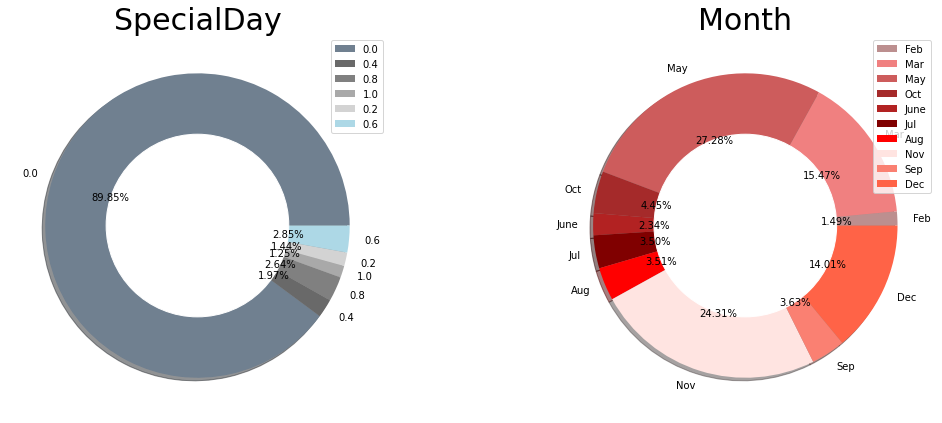

In [8]:
#print(data['Month'].value_counts(sort = False))
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 478, 111]
colors = ['slategray', 'dimgray', 'gray', 'darkgray', 'lightgray', 'lightblue']
explode = [0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(data['SpecialDay'].value_counts(sort = False), colors = colors, labels = data['SpecialDay'].unique(), explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('SpecialDay', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'red', 'mistyrose', 'salmon', 'tomato']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(data['Month'].value_counts(sort = False), colors = colors, labels = data['Month'].unique(), explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()



plt.show()

TrafficType

定義：網站訪問者的數量，以及他們點擊的頁面，被稱為網站流量。

舉例：流量是我們用來描述用戶/訪問者及其在您網站上的活動的總體術語。 有不同類型的流量：直接、自然、推薦、社交、電子郵件、展示和付費。

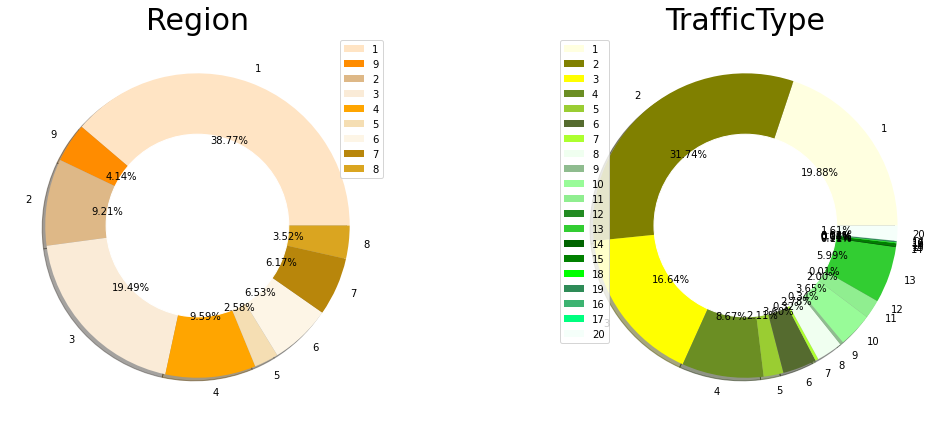

In [9]:
#print(data['TrafficType'].value_counts(sort = False))
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 478, 111]
colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'orange', 'wheat', 'oldlace', 'darkgoldenrod', 'goldenrod']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(data['Region'].value_counts(sort = False), colors = colors, labels = data['Region'].unique(), explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Region', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['lightyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(data['TrafficType'].value_counts(sort = False), colors = colors, labels = data['TrafficType'].unique(), explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('TrafficType', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()



plt.show()

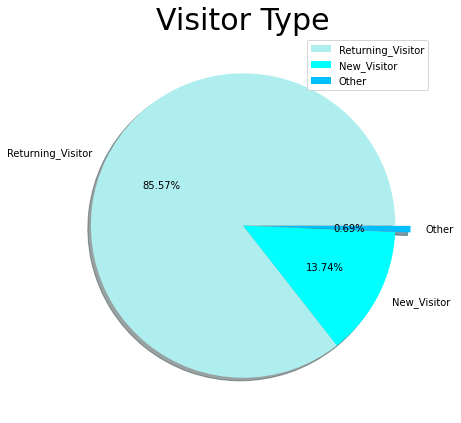

In [10]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['paleturquoise', 'aqua', 'deepskyblue']
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(data['VisitorType'].value_counts(sort = False), colors = colors, labels = data['VisitorType'].unique(), explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Visitor Type', fontsize = 30)
plt.axis('off')
plt.legend()

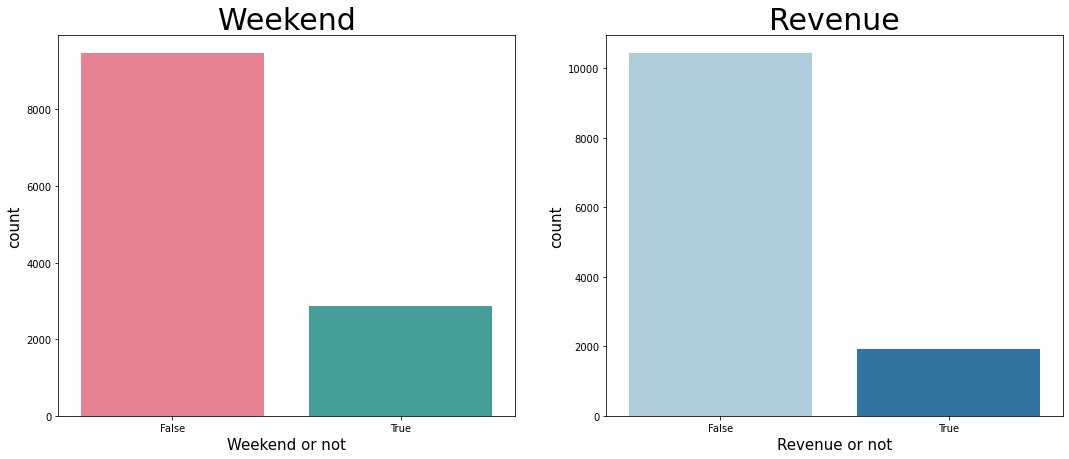

In [11]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(x=data['Weekend'], palette = "husl")
plt.title('Weekend', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(x=data['Revenue'], palette = "Paired")
plt.title('Revenue', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

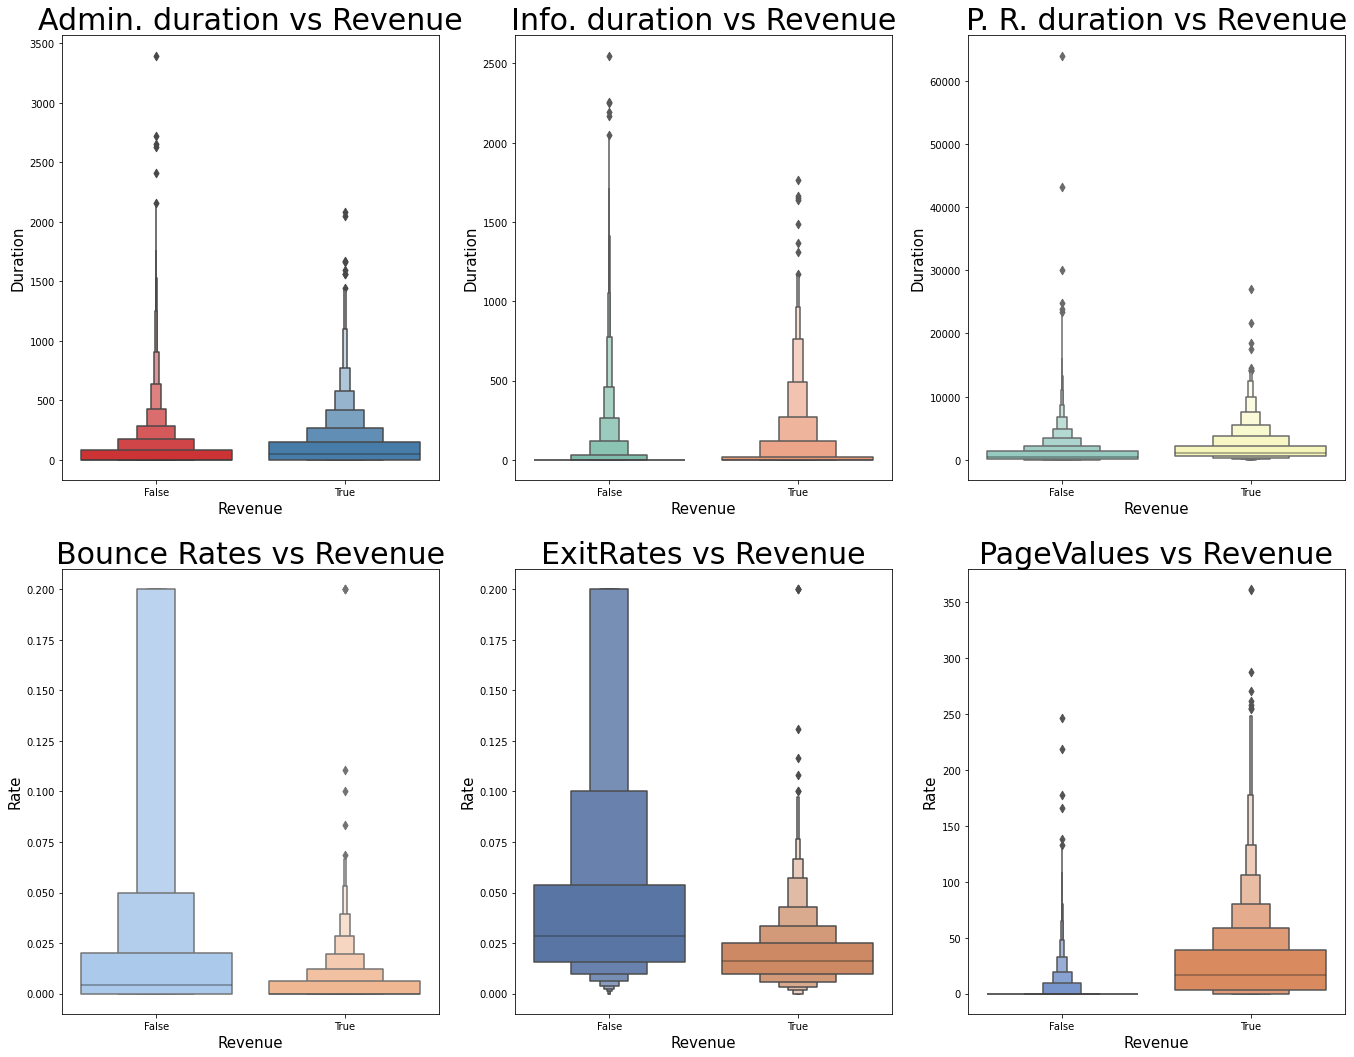

In [12]:
plt.rcParams['figure.figsize'] = (23, 18)

plt.subplot(2, 3, 1)
sns.boxenplot(x=data['Revenue'], y=data['Administrative_Duration'], palette = 'Set1')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Duration', fontsize = 15)

plt.subplot(2, 3, 2)
sns.boxenplot(x=data['Revenue'], y=data['Informational_Duration'], palette = 'Set2')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Duration', fontsize = 15)

plt.subplot(2, 3, 3)
sns.boxenplot(x=data['Revenue'], y=data['ProductRelated_Duration'], palette = 'Set3')
plt.title('P. R. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Duration', fontsize = 15)

plt.subplot(2, 3, 4)
sns.boxenplot(x=data['Revenue'], y=data['BounceRates'], palette = 'pastel')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Rate', fontsize = 15)

plt.subplot(2, 3, 5)
sns.boxenplot(x=data['Revenue'], y=data['ExitRates'], palette = 'deep')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Rate', fontsize = 15)

plt.subplot(2, 3, 6)
sns.boxenplot(x=data['Revenue'], y=data['PageValues'], palette = 'muted')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Rate', fontsize = 15)


plt.show()

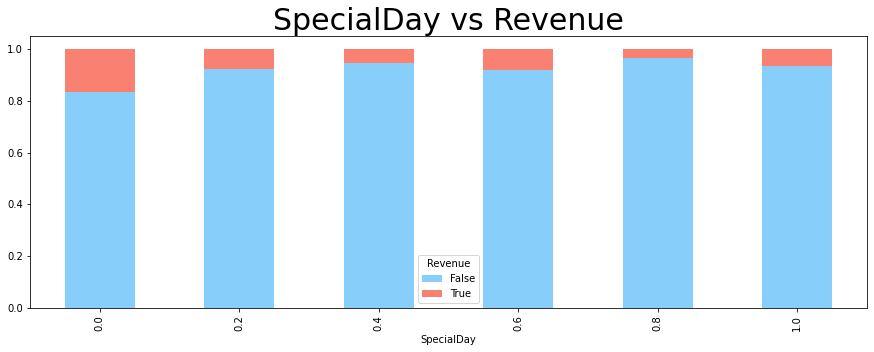

In [13]:
df = pd.crosstab(data['SpecialDay'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightskyblue', 'salmon'])
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.show()

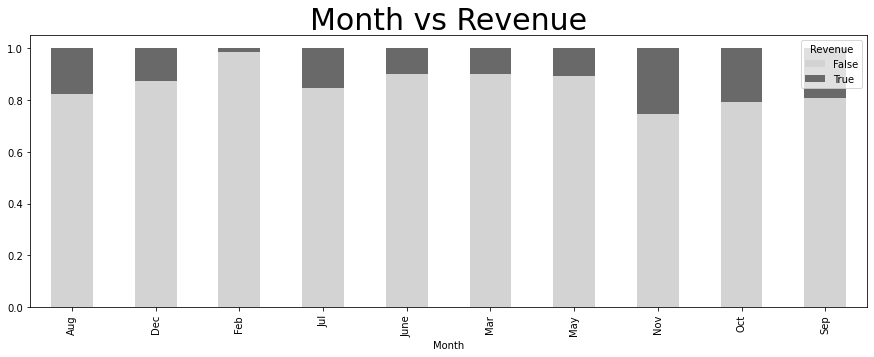

In [14]:
df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgray', 'dimgray'])
plt.title('Month vs Revenue', fontsize = 30)
plt.show()

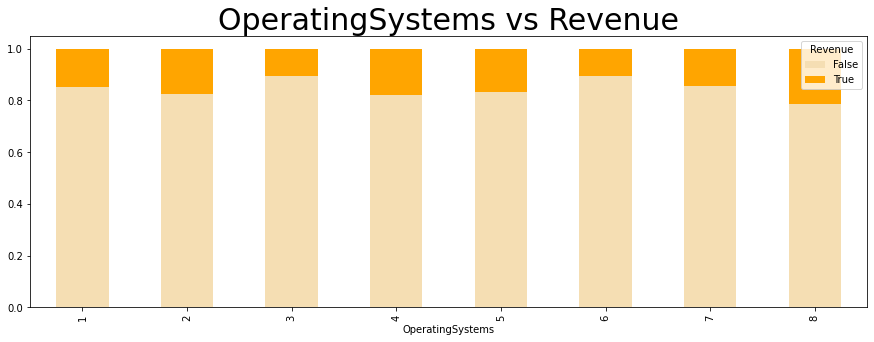

In [15]:
df = pd.crosstab(data['OperatingSystems'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['wheat', 'orange'])
plt.title('OperatingSystems vs Revenue', fontsize = 30)
plt.show()

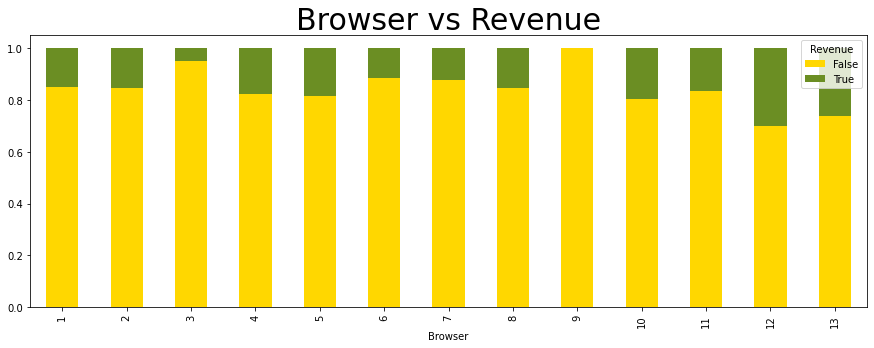

In [16]:
df = pd.crosstab(data['Browser'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['gold', 'olivedrab'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

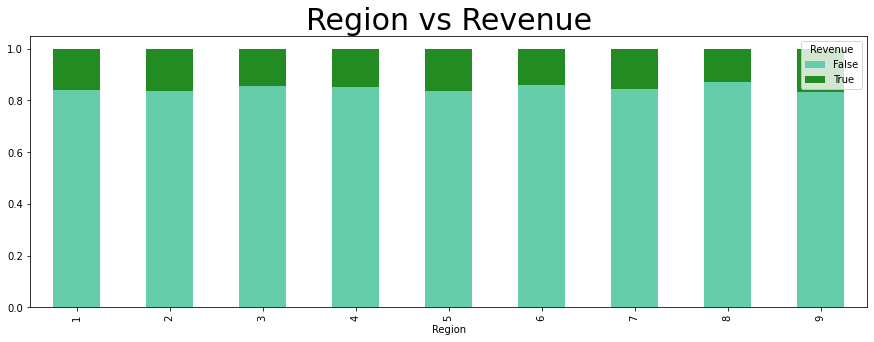

In [17]:
df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['mediumaquamarine', 'forestgreen'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

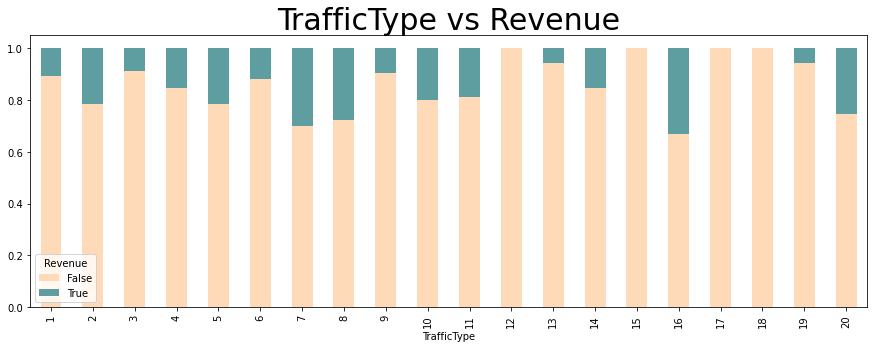

In [18]:
df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['peachpuff', 'cadetblue'])
plt.title('TrafficType vs Revenue', fontsize = 30)
plt.show()

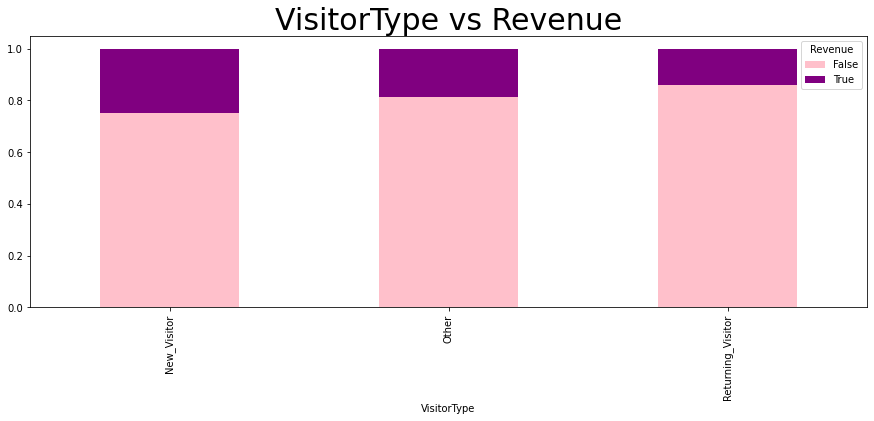

In [19]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'purple'])
plt.title('VisitorType vs Revenue', fontsize = 30)
plt.show()

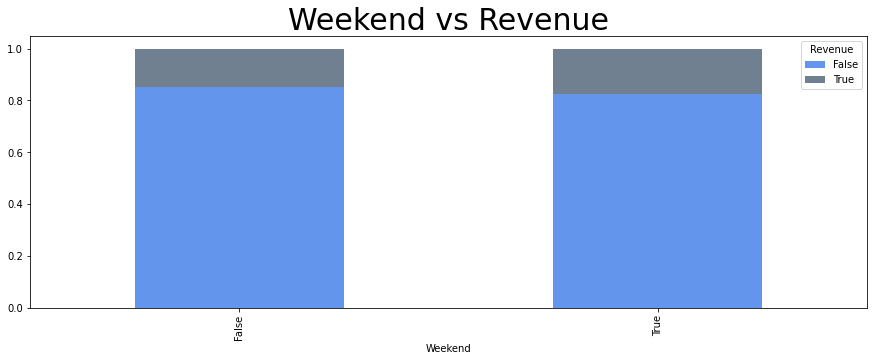

In [20]:
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['cornflowerblue', 'slategray'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

# III. Preprocessing:


填補缺漏值(Missing Values): 經過分析發現並沒有缺漏植，因此也不需要填補

In [21]:
missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


對feature進行one hot encoding，將某些分類名稱為文字的categorical feature變成機器學習model可以讀取的One hot encoding形式。並用LabelEncoder將label(Revenue)的False和True轉成0和1。

In [22]:
x = pd.get_dummies(data.drop(['Revenue'], axis = 1))
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()
y = data['Revenue']
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print(x[:0])

Shape of x: (12330, 28)
Shape of y: (12330,)
Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType, Weekend, Month_Aug, Month_Dec, Month_Feb, Month_Jul, Month_June, Month_Mar, Month_May, Month_Nov, Month_Oct, Month_Sep, VisitorType_New_Visitor, VisitorType_Other, VisitorType_Returning_Visitor]
Index: []

[0 rows x 28 columns]


In [23]:
print(x.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...          0           0   
1         0.00       0.10         0.0         0.0 

將x設為data, y設為target，並利用train_test_split來做Holdout validation with the ratio 7:3(test_size=0.3)，random_state做suffle

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=87)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


# IV. Models & V. Results: 

用svm.SVC來建module，kernel='rbf'來建RBF kernel的models。 用module.fit(x_train, y_train)來訓練模型，module.predict(x_test)來預測x_test的結果並再與y_test比對來得出各種資料。
confusion_matrix(y_test,pre)為混淆矩陣，sns.heatmap(mat,square= True, annot=True, cbar= False)則繪製混淆矩陣的熱圖。 用classification_report(y_test, pre)來展示出Accuracy, Recall, Precision。

用 grid search 去找出 the best hyperparameter pair for this model, and show the average accuracy of K-fold cross-validation of parameter search for each module.

In [25]:
best_score = 0
for gamma in [0.00001,0.0001,0.001,0.01,1]:
    module1 = svm.SVC(kernel='rbf', gamma=gamma)
    pre = cross_val_predict(module1, x_train, y_train, cv=5)
    score = metrics.accuracy_score(y_train, pre)
    print('Gamma: {}'.format(gamma))
    print('Score: {:.3f}'.format(score))
    print('')
    if score > best_score:
        best_score = score
        best_gamma = gamma

Gamma: 1e-05
Score: 0.875

Gamma: 0.0001
Score: 0.880

Gamma: 0.001
Score: 0.866

Gamma: 0.01
Score: 0.847

Gamma: 1
Score: 0.847



Best_gamma: 0.0001 
Best_score: 0.880


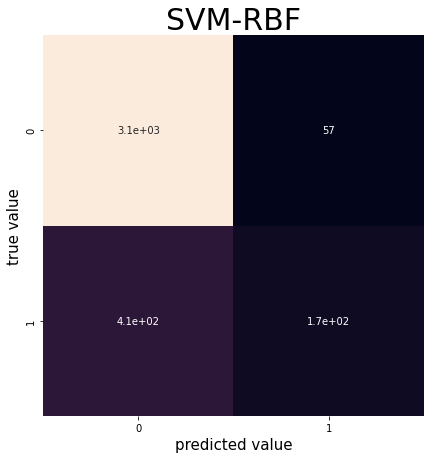

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3114
           1       0.75      0.30      0.42       585

    accuracy                           0.87      3699
   macro avg       0.82      0.64      0.68      3699
weighted avg       0.86      0.87      0.85      3699



In [26]:
print('Best_gamma: {} '.format(best_gamma))
print('Best_score: {:.3f}'.format(best_score))
module1 = svm.SVC(kernel='rbf', gamma=best_gamma)
module1.fit(x_train, y_train)
pre = module1.predict(x_test)
mat = confusion_matrix(y_test,pre)
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("true value", fontsize = 15)
plt.title("SVM-RBF", fontsize = 30)
plt.show()
print(classification_report(y_test, pre))

## RandomForestClassifier
用RandomForestClassifier()來建module，並用n_estimators來設定The number of trees in the forest.。
用module2.fit(x1_train, y1_train)來訓練模型，module1.predict(x1_test)來預測x1_test的結果並再與y1_test比對來得出各種資料。 confusion_matrix(y1_test,pre2)為混淆矩陣，sns.heatmap(mat2,square= True, annot=True, cbar= False)則繪製混淆矩陣的熱圖。 最後則用classification_report來展示結果。

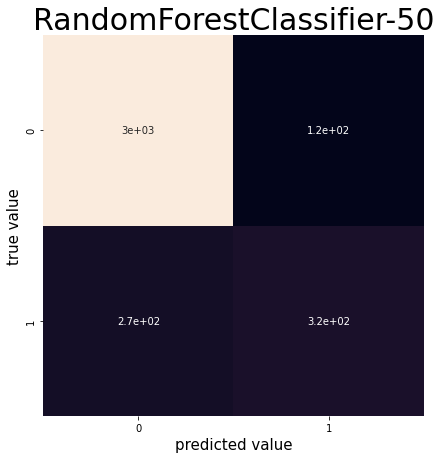

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3114
           1       0.73      0.54      0.62       585

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



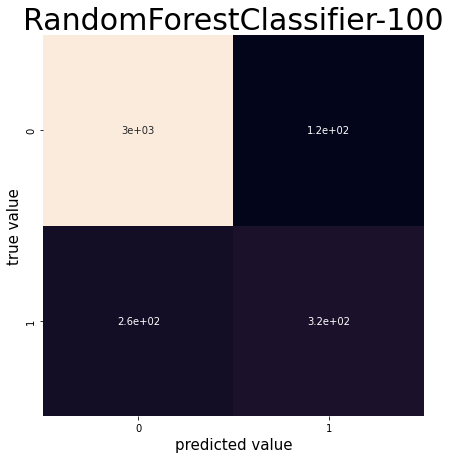

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3114
           1       0.73      0.56      0.63       585

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



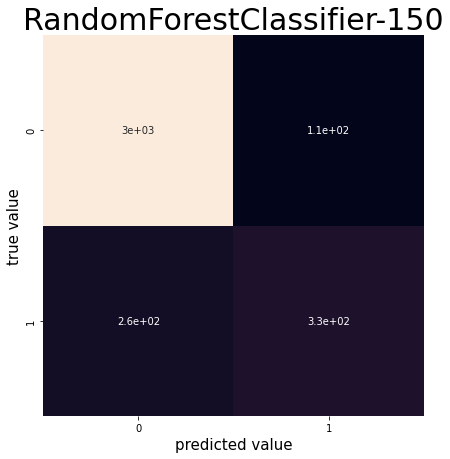

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3114
           1       0.74      0.56      0.64       585

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [27]:
model2 = RandomForestClassifier(n_estimators = 50)
model2.fit(x_train, y_train)
pre2 = model2.predict(x_test)
mat2 = confusion_matrix(y_test,pre2)
sns.heatmap(mat2,square= True, annot=True, cbar= False)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("true value", fontsize = 15)
plt.title("RandomForestClassifier-50", fontsize = 30)
plt.show()
print(classification_report(y_test, pre2))

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
pre2 = model2.predict(x_test)
mat2 = confusion_matrix(y_test,pre2)
sns.heatmap(mat2,square= True, annot=True, cbar= False)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("true value", fontsize = 15)
plt.title("RandomForestClassifier-100", fontsize = 30)
plt.show()
print(classification_report(y_test, pre2))

model2 = RandomForestClassifier(n_estimators = 150)
model2.fit(x_train, y_train)
pre2 = model2.predict(x_test)
mat2 = confusion_matrix(y_test,pre2)
sns.heatmap(mat2,square= True, annot=True, cbar= False)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("true value", fontsize = 15)
plt.title("RandomForestClassifier-150", fontsize = 30)
plt.show()
print(classification_report(y_test, pre2))

用backend.cast_to_floatx把原本的資料都改成浮點數字串並回傳，使其可以被keras的多層感知器給讀進去。

In [28]:
x_train1 = backend.cast_to_floatx(x_train)
y_train1 = backend.cast_to_floatx(y_train)
x_test1 = backend.cast_to_floatx(x_test)
y_test1 = backend.cast_to_floatx(y_test)
print("Shape of x_train1 :", x_train1.shape)
print("Shape of y_train1 :", y_train1.shape)
print("Shape of x_test1 :", x_test1.shape)
print("Shape of y_test1 :", y_test1.shape)

Shape of x_train1 : (8631, 28)
Shape of y_train1 : (8631,)
Shape of x_test1 : (3699, 28)
Shape of y_test1 : (3699,)


用Dense去建立每一層的神經元，units為每一層的神經元數，input_dim唯一開始輸入的feature數，kernel_initializer為神經元權重初始分佈，activation為激活函數。
keras.optimizers.Adam(learning_rate=0.00001)為梯度下降函數，用compile把loss, opt, metrics設定綁再一起，model3.fit來訓練model，而validation_split為驗證比例，epochs為資料集的完整迭代次數。

In [29]:
model3 = Sequential()
model3.add(Dense(units = 40, input_dim = 28, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.00001)
model3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

train_history = model3.fit(x=x_train1, y=y_train1, validation_split=0.1, epochs=150, batch_size=30, verbose=2)

Epoch 1/150
259/259 - 1s - loss: 0.6370 - accuracy: 0.8464 - val_loss: 0.6471 - val_accuracy: 0.8426 - 807ms/epoch - 3ms/step
Epoch 2/150
259/259 - 0s - loss: 0.6276 - accuracy: 0.8472 - val_loss: 0.6440 - val_accuracy: 0.8426 - 258ms/epoch - 997us/step
Epoch 3/150
259/259 - 0s - loss: 0.6227 - accuracy: 0.8472 - val_loss: 0.6378 - val_accuracy: 0.8426 - 282ms/epoch - 1ms/step
Epoch 4/150
259/259 - 0s - loss: 0.6157 - accuracy: 0.8472 - val_loss: 0.6309 - val_accuracy: 0.8426 - 335ms/epoch - 1ms/step
Epoch 5/150
259/259 - 0s - loss: 0.6076 - accuracy: 0.8478 - val_loss: 0.6220 - val_accuracy: 0.8426 - 328ms/epoch - 1ms/step
Epoch 6/150
259/259 - 0s - loss: 0.5978 - accuracy: 0.8490 - val_loss: 0.6087 - val_accuracy: 0.8426 - 226ms/epoch - 874us/step
Epoch 7/150
259/259 - 0s - loss: 0.5884 - accuracy: 0.8507 - val_loss: 0.6017 - val_accuracy: 0.8426 - 275ms/epoch - 1ms/step
Epoch 8/150
259/259 - 0s - loss: 0.5778 - accuracy: 0.8532 - val_loss: 0.5883 - val_accuracy: 0.8449 - 329ms/epoch

定義show_train_history來可視化訓練過程

In [30]:
def show_train_history(train_history, train, validation):    #訓練過程產生的 train_history 
    plt.plot(train_history.history[train])                   # y= 訓練資料執行結果
    plt.plot(train_history.history[validation])              # y= 驗證資料執行結果 
    plt.title('Train History', fontsize = 30)                # plot 標題
    plt.ylabel(train, fontsize = 15)                         # y 軸標籤
    plt.xlabel('Epoch', fontsize = 15)                       # x 軸標籤
    plt.legend(['train','validation'],loc='upper left')      #圖例顯示'train' , 'validation' 位置設在左上角
    plt.show()

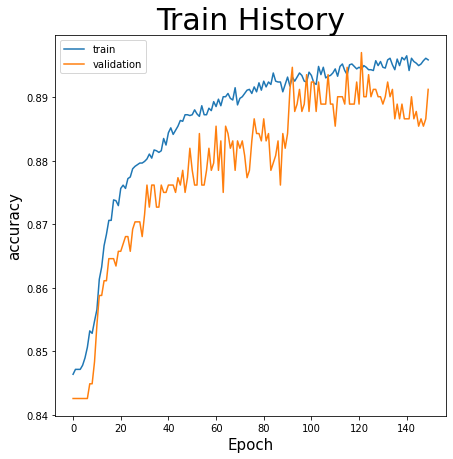

In [31]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

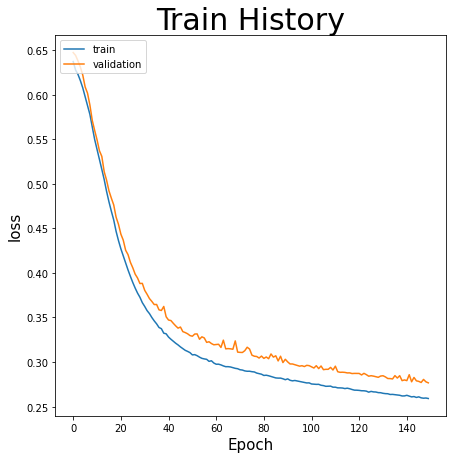

In [32]:
show_train_history(train_history, 'loss', 'val_loss')

Shape of pre3 : (3699,)
Shape of y_train1 : (3699,)


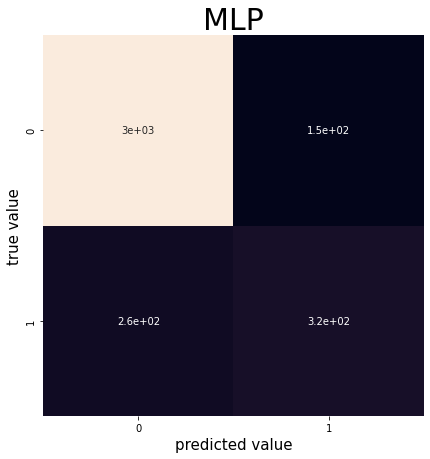

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      3114
         1.0       0.68      0.55      0.61       585

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.88      3699



In [33]:
pre3 = model3.predict(x_test1)
pre3 = pre3.reshape(3699)
y_test1 = y_test1.reshape(3699)
print("Shape of pre3 :", pre3.shape)
print("Shape of y_train1 :", y_test1.shape)
mat3 = confusion_matrix(y_test1,np.around(pre3))
sns.heatmap(mat3,square= True, annot=True, cbar= False)
plt.xlabel("predicted value", fontsize = 15)
plt.ylabel("true value", fontsize = 15)
plt.title("MLP", fontsize = 30)
plt.show()

#plt.rcParams['figure.figsize'] = (6, 6)
#sns.heatmap(mat3 ,annot = True)

# classification report
print(classification_report(y_test1,np.around(pre3)))

# VI. Conclusion:
svm使用的是rbf kernel，score隨著gamma到0.0001時到達最高點後便下降。RandomForestClassifier則是不管n_estimators設為50, 100, 150結果accuracy都為0.90。最後mlp的建神經元隱藏層的部分則是試過了許多不同的learning rate以及層數和迭代數，發現最後極限也都落在accuracy為0.9附近。
這次的project算是我對這個學期學習機器學習的總複習，其中最麻煩也是花最多時間的竟不是建立model的部分，而是尋找主題與資料集以及其後面讓資料可以被mlp模型讀取的部分。